In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

In [8]:
# 데이터 준비

columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]

mpg_df = pd.read_csv('drive/MyDrive/Colab Notebooks/data-files/auto-mpg.data', names=columns,
                     sep=" ", na_values="?", comment="\t", skipinitialspace=True)
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
# 데이터 준비 2
# 1. mpg 컬럼을 y로 나머지 컬럼을 x로 분할
# 2. origin 컬럼을 one-hot-encoding 처리
# 3. 회귀모델 만들기 : mpg(y)를 예측하는 회귀모델
# 4. 훈련데이터 평가

In [23]:
# 데이터 준비 2-1
mpg_df.dropna(inplace=True)
y = mpg_df['mpg'].values
X = mpg_df.drop('mpg', axis=1)

X.shape, y.shape

((392, 7), (392,))

In [24]:
# 데이터 준비 2-2

ohe_orgin = pd.get_dummies(X['origin']).astype(int)
X = pd.concat([X.drop('origin', axis=1), ohe_orgin], axis=1)
X.rename(columns={1: "USA", 2: "Europe", 3: "Japan"}, inplace=True)
X.head()

X = X.values

In [25]:
X.shape

(392, 9)

In [26]:
# 모델 구조 설계

model = tf_keras.Sequential()
model.add(tf_keras.layers.Input(shape=(9, )))
model.add(tf_keras.layers.Dense(64, activation='relu'))
model.add(tf_keras.layers.Dense(32, activation='relu'))
model.add(tf_keras.layers.Dense(1)) # 회귀 모델의 경우 출력층의 유닛갯수는 1

In [29]:
# 모델 훈련 설계

model.compile(loss="mse",
              optimizer="adam",
              metrics=['mae'])

In [ ]:
# 모델 학습 (훈련)

fit_history = model.fit(X, y, batch_size=16, epochs=100)

In [38]:
print( model.evaluate(X, y)[1],  y.mean() )
print( model.evaluate(X, y)[1] / y.mean() )

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.7586 - mae: 2.9554 
3.1165072917938232 23.445918367346938
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.7586 - mae: 2.9554 
0.13292323392775154


In [32]:
fit_history.history.keys()

dict_keys(['loss', 'mae'])

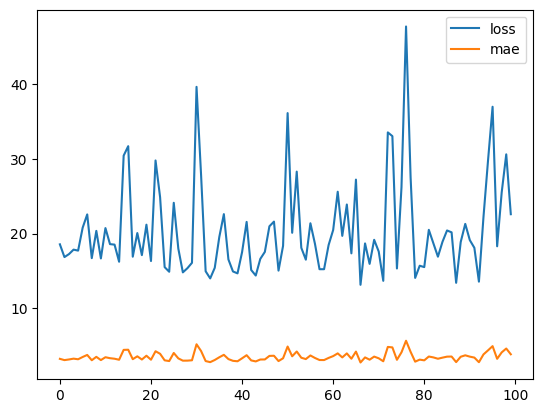

In [33]:
plt.plot(fit_history.epoch, fit_history.history['loss'], label="loss")
plt.plot(fit_history.epoch, fit_history.history['mae'], label="mae")
plt.legend()
plt.show()